In [2]:
import numpy as np
import os 
import pandas as pd
#from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import ensemble, tree, linear_model
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
import pyodbc
import seaborn as sns

import re
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import ks_2samp
from scipy.stats import norm
#import missingno as msno
import warnings
import datetime
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import nltk
#nltk.download('popular')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
path = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\DATA"
path_result = r"C:\Users\eitanb\Documents\GitHub\ML_Football_DS18\result"

In [4]:
df=pd.read_csv(path+"/"+"team_results.csv")

In [25]:
df_base=df.drop(columns=['gameID', 'homeTeamID', 'awayTeamID'])


# outliers

In [26]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        if col != 'result_h':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers=outliers_boxplot(df_base)
outliers

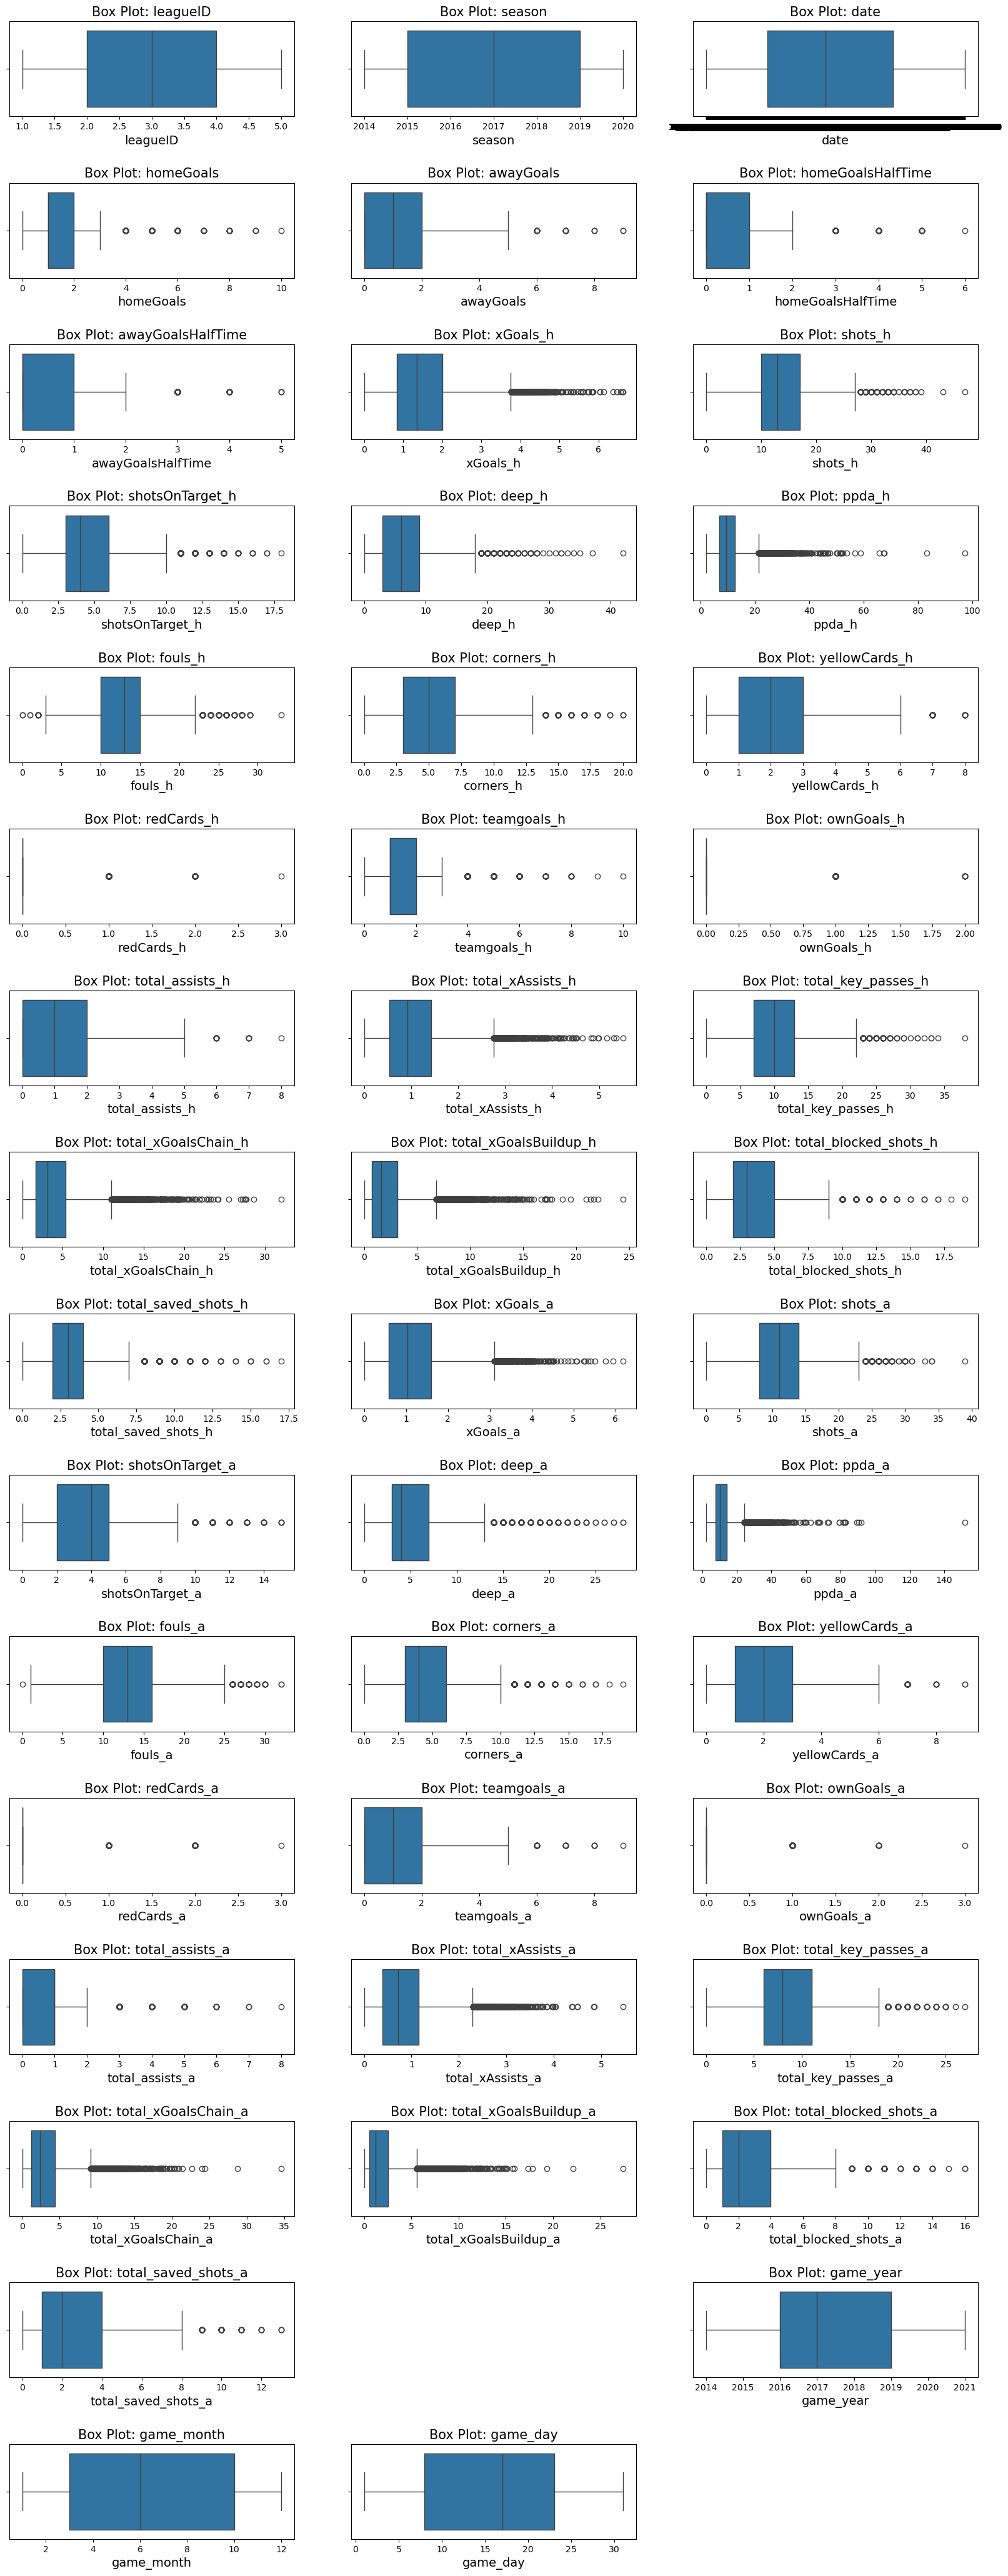

In [27]:
outliers
plt.show()

# Nulls matrix

In [28]:
df_nulls = df.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,yellowCards_h,total_blocked_shots_h,total_saved_shots_h,total_blocked_shots_a,total_saved_shots_a
0,2.0,4.0,1.0,3.0,4.0
1,3.0,2.0,2.0,2.0,2.0
2,1.0,2.0,3.0,3.0,3.0
3,2.0,4.0,4.0,2.0,3.0
4,1.0,3.0,4.0,2.0,4.0
...,...,...,...,...,...
12675,2.0,6.0,4.0,1.0,3.0
12676,1.0,3.0,2.0,4.0,3.0
12677,1.0,2.0,4.0,0.0,2.0
12678,1.0,5.0,5.0,1.0,1.0


In [16]:
import missingno as msno
msno.matrix(df_nulls)

ModuleNotFoundError: No module named 'missingno'

#### Dataframe containing missing value counts and their frequency:

In [9]:
mis_val = df_nulls.isna().sum()
mis_val_per = df_nulls.isna().sum()/len(df_nulls)*100
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,:] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
total_blocked_shots_a,8,0.1
total_saved_shots_a,8,0.1
total_blocked_shots_h,3,0.0
total_saved_shots_h,3,0.0
yellowCards_h,1,0.0


### Outliers Analysis

In [11]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns={'Outlier count','Percent'})
    for col in df:
        if col != 'host_is_superhost':
            temp = pd.DataFrame(df[col], columns={col})
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            upper_outliers = temp[temp[col] > upper_limit]
            lower_outliers = temp[temp[col] < lower_limit]
            temp = upper_outliers.append(lower_outliers)
            b = "{}".format(col)
            num = len(temp)
            total_outliers.loc[b] = [num, num/len(df)*100]
    return total_outliers[total_outliers['Percent']>0]
       
outliers_df = outliers_df(df_num_non_dummy).sort_values('Percent', ascending=False)
outliers_df

NameError: name 'df_num_non_dummy' is not defined